In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***1- Data Definition***

hotel: نوع الفندق (Resort Hotel أو City Hotel).

is_canceled: هل تم إلغاء الحجز؟ (1 = نعم، 0 = لا).

lead_time: عدد الأيام بين تاريخ الحجز وتاريخ الوصول.

arrival_date_year: سنة الوصول.

arrival_date_month: شهر الوصول.

arrival_date_week_number: رقم أسبوع الوصول في السنة.

arrival_date_day_of_month: يوم الوصول في الشهر.

stays_in_weekend_nights: عدد ليالي الإقامة في عطلة نهاية الأسبوع.

stays_in_week_nights: عدد ليالي الإقامة في أيام الأسبوع.

adults: عدد البالغين.

children: عدد الأطفال.

babies: عدد الرضع.

meal: نوع الوجبة.

country: بلد العميل.

market_segment: قطاع السوق الذي تم منه الحجز.

distribution_channel: القناة التي تم منها الحجز.

is_repeated_guest: هل العميل ضيف متكرر؟ (1 = نعم، 0 = لا).

previous_cancellations: عدد الحجوزات السابقة التي تم إلغاؤها.

previous_bookings_not_canceled: عدد الحجوزات السابقة غير الملغاة.

reserved_room_type: نوع الغرفة المحجوزة.

assigned_room_type: نوع الغرفة المعطاة للعميل عند الوصول.

booking_changes: عدد التغييرات التي أجريت على الحجز.

deposit_type: نوع الايداع المالي.

agent: رمز الوكيل المستخدم للحجز.

company: رمز الشركة التي تم الحجز من خلالها.

days_in_waiting_list: عدد الأيام في قائمة الانتظار.

customer_type: نوع العميل (Transient، Contract، Group، أو Transient-Party).

adr: متوسط السعر اليومي وهو (إجمالي الإيرادات من الغرف المحجوزة / عدد الليالي المحجوزة)

required_car_parking_spaces: عدد مواقف السيارات المطلوبة.

total_of_special_requests: عدد الطلبات الخاصة المقدمة من العميل.

reservation_status: حالة الحجز (Check-Out، Canceled، No-Show).

reservation_status_date: تاريخ تحديث حالة الحجز.



# ***Hotel Booking Analysis***

**1- EDA (Exploratory Data Analysis) & Cleaning**

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


**Check of Null Values**

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#columns "agent", "company" have so many missing values, and columns "country", "children" have some missing values.
#check if it's important

df['agent'].value_counts()

,count
agent,
9.0,31961
240.0,13922
1.0,7191
14.0,3640
7.0,3539
...,...
408.0,1
388.0,1
453.0,1


In [ ]:
#since "agent" & "company" columns are just Id and with high missing values, so we may drop them

df.drop(columns=['agent','company'],inplace=True)

In [ ]:
df['children'].value_counts(), df['babies'].value_counts()

(children
 0.0     110620
 1.0       4861
 2.0       3652
 3.0         76
 10.0         1
 Name: count, dtype: int64,
 babies
 0     118293
 1        900
 2         15
 10         1
 9          1
 Name: count, dtype: int64)

In [ ]:
df['children'].fillna(0,inplace=True)

<ipython-input-10-833de8cbfd38>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0,inplace=True)


In [ ]:
df['children'].isna().sum()

0

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df['country'].value_counts()

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
FJI,1
UMI,1
LCA,1


In [ ]:
df['country'] = df['country'].fillna('PRT')
df
#Now there's no Null Values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


***Preprocessing*** (Handling Outliers and Dublicates and Logical Errors)


In [ ]:
#it's illogical to have 0 adults and 0 children and 0 babies in the same record so we drop them

df = df[(df['adults'] + df['children'] + df['babies']) > 0]

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#checking The Zero adults since no Hotel would accept from only kids

df['adults'].mean(), df['adults'].median()

(1.8592064424125492, 2.0)

In [ ]:
#replacing 0 values of adults to the average value 2
df['adults'].replace(0,2,inplace=True)

<ipython-input-19-214782c40c0e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['adults'].replace(0,2,inplace=True)
<ipython-input-19-214782c40c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adults'].replace(0,2,inplace=True)


In [ ]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55, 20,  6,  5, 10])

In [ ]:
df['children'].value_counts(), df['babies'].value_counts()

(children
 0.0     110620
 1.0       4861
 2.0       3652
 3.0         76
 10.0         1
 Name: count, dtype: int64,
 babies
 0     118293
 1        900
 2         15
 10         1
 9          1
 Name: count, dtype: int64)

In [ ]:
#fixing outliers of cheldren and babies columns
df['children'].replace(10,0,inplace=True)
df['babies'].replace(10,0,inplace=True)
df['babies'].replace(9,0,inplace=True)

<ipython-input-22-abae3ef4797c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].replace(10,0,inplace=True)
<ipython-input-22-abae3ef4797c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'].replace(10,0,inplace=True)
<ipython-input-22-abae3ef4797c>:3: FutureWarning: A value is trying to be set on a copy of a DataFr

In [ ]:
df['children'].value_counts(), df['babies'].value_counts()

(children
 0.0    110621
 1.0      4861
 2.0      3652
 3.0        76
 Name: count, dtype: int64,
 babies
 0    118295
 1       900
 2        15
 Name: count, dtype: int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

In [ ]:
#reservation_status_date was assigned as an object not datetime

df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

<ipython-input-25-3d70764405f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])


In [ ]:
#checking the Outliers of adults coulmn
df.adults.value_counts()

,count
adults,
2,89903
1,23027
3,6202
4,62
26,5
5,2
27,2
20,2
40,1


In [ ]:
df11 = df

In [ ]:
#setting any value more than 4 to 1

df11['adults'].loc[df['adults']>4] = 1
df11.describe()

<ipython-input-28-e23f8a337469>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df11['adults'].loc[df['adults']>4] = 1
<ipython-input-28-e23f8a337469>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859768,0.103959,0.007801,0.031499,0.087191,0.137094,0.218799,2.321215,101.969092,0.062553,0.571504,2016-07-29 22:20:25.709252864
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.950000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,2.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.477222,0.397804,0.089399,0.174663,0.844918,1.498137,0.638504,17.598002,50.434007,0.245360,0.792876,NaN


In [ ]:
df11['days_in_waiting_list'].value_counts()

,count
days_in_waiting_list,
0,115517
39,227
58,164
44,141
31,127
...,...
109,1
37,1
193,1


In [ ]:
#simce almost any value other than 0 is outlier we set them all to 0

df11['days_in_waiting_list'] = [0 for x in df11['days_in_waiting_list']]

<ipython-input-30-cb3f35f501a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['days_in_waiting_list'] = [0 for x in df11['days_in_waiting_list']]


In [ ]:
df11['days_in_waiting_list'].unique()

array([0])

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  float64     

In [ ]:
df11.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.0,119210.000000,119210.000000,119210.000000,119210
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859768,0.103959,0.007801,0.031499,0.087191,0.137094,0.218799,0.0,101.969092,0.062553,0.571504,2016-07-29 22:20:25.709252864
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,69.500000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,94.950000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,2.000000,1.000000,26.000000,72.000000,18.000000,0.0,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.477222,0.397804,0.089399,0.174663,0.844918,1.498137,0.638504,0.0,50.434007,0.245360,0.792876,NaN


In [ ]:
#for adr column there's a lot of wrong values and outliers

df11['adr'].median(), df11['adr'].mode()

(94.95,
 0    62.0
 Name: adr, dtype: float64)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcdd1e7cb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcdd1e7e150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcdd20f4490>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcdd1e7f710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcdd1e88050>],
 'means': []}

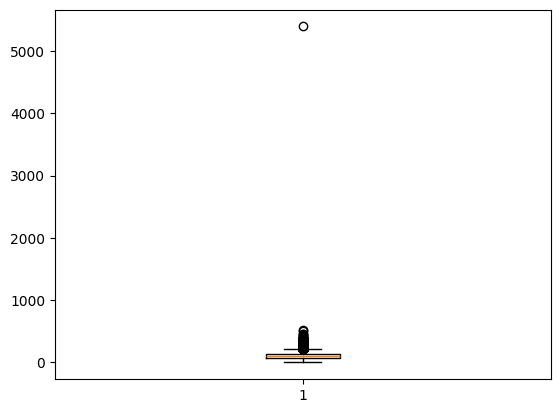

In [ ]:
plt.boxplot(df11['adr'])

In [ ]:
df11['adr'] = df11['adr'].loc[df11['adr']<5000]

<ipython-input-36-7f59bd85088e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['adr'] = df11['adr'].loc[df11['adr']<5000]


<Axes: ylabel='adr'>

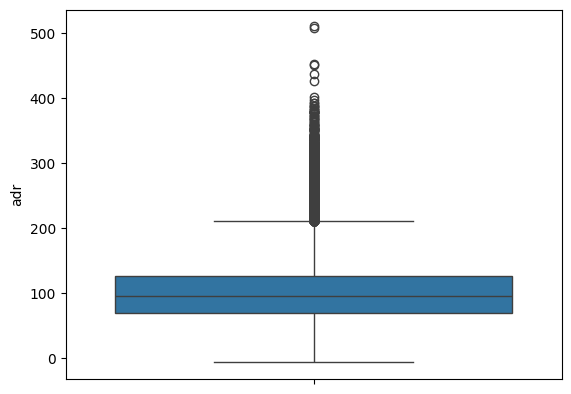

In [ ]:
sns.boxplot(df11.adr)

In [ ]:
#replacing any value more than 200 with the average value
df11['adr'].loc[df11['adr']>200] = df11['adr'].mean()
df11['adr'].loc[df11['adr']<0] = df11['adr'].mean()

<ipython-input-38-bf6b5ca7b3d8>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df11['adr'].loc[df11['adr']>200] = df11['adr'].mean()
<ipython-input-38-bf6b5ca7b3d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

<Axes: ylabel='adr'>

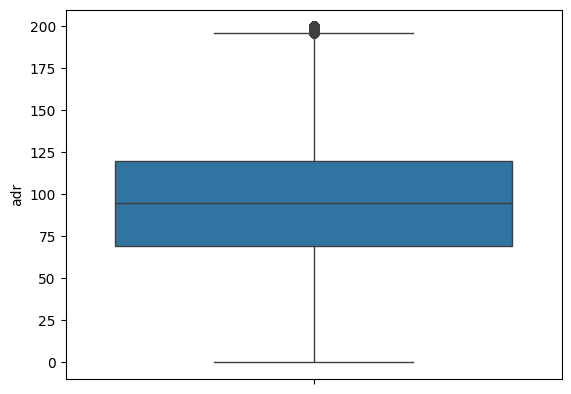

In [ ]:
sns.boxplot(df11.adr)

**Checking for duplicates**

In [ ]:
df11.duplicated().sum()

32052

In [ ]:
df11.drop_duplicates(inplace=True)

<ipython-input-41-4530f32879ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.drop_duplicates(inplace=True)


In [ ]:
df11.shape

(87158, 30)

In [ ]:
df11['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

<Axes: ylabel='lead_time'>

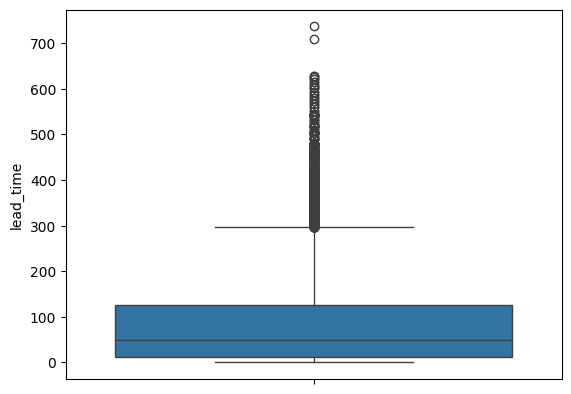

In [ ]:
#checking for Lead_time Outliers
sns.boxplot(df11['lead_time'])

In [ ]:
df11['lead_time'].median(), df11['lead_time'].mode()

(49.0,
 0    0
 Name: lead_time, dtype: int64)

In [ ]:
df11['lead_time'].value_counts()

,count
lead_time,
0,5895
1,3198
2,1919
3,1702
4,1562
...,...
507,1
709,1
605,1


In [ ]:
# Removing any value greater than 350 since it is not logical to book a hotel more than a year in advance.

df11['lead_time'].loc[df11['lead_time']>350] = df11['lead_time'].mean()

<ipython-input-47-ce21ac271d5d>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df11['lead_time'].loc[df11['lead_time']>350] = df11['lead_time'].mean()
<ipython-input-47-ce21ac271d5d>:3: SettingWithCopyWarning: 
A value is trying to be set 

In [ ]:
df11.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.0,87157.000000,87158.000000,87158.000000,87158
mean,0.275316,76.915661,2016.210308,26.835242,15.816379,1.004842,2.624142,1.880195,0.138794,0.010613,0.038597,0.030427,0.184206,0.268570,0.0,99.139611,0.084364,0.698961,2016-08-31 02:25:55.189425920
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,98.180000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,121.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,125.100000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,350.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,2.000000,1.000000,26.000000,72.000000,18.000000,0.0,200.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446676,79.648945,0.686095,13.669256,8.835297,1.027497,2.039977,0.495734,0.455029,0.104137,0.192633,0.369496,1.733741,0.710803,0.0,40.613373,0.281748,0.831870,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x7bcdcf9c6ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcdcf9c7fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcdcf9c6690>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcdcf9b9550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcdcf9ba050>],
 'means': []}

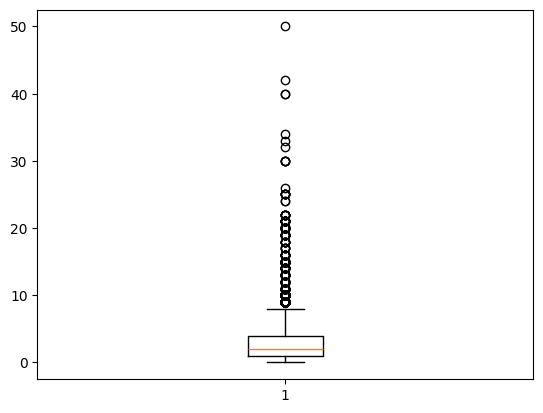

In [ ]:
plt.boxplot(df11['stays_in_week_nights'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcdcf967410>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcdcf954cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcdcf966850>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcdcf9563d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcdcf956ed0>],
 'means': []}

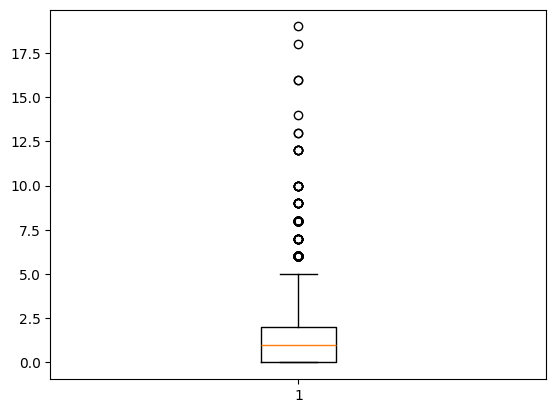

In [ ]:
plt.boxplot(df11['stays_in_weekend_nights'])

In [ ]:
#replacing any value greater than 5 with the average value since there's only 5 days for the weekdays

df11['stays_in_week_nights'].loc[df11['stays_in_week_nights']>5] = int(df11['stays_in_week_nights'].mean())

<ipython-input-51-1663e145c882>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df11['stays_in_week_nights'].loc[df11['stays_in_week_nights']>5] = int(df11['stays_in_week_nights'].mean())
<ipython-input-51-1663e145c882>:3: SettingWithCopyWa

In [ ]:
df11.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.0,87157.000000,87158.000000,87158.000000,87158
mean,0.275316,76.915661,2016.210308,26.835242,15.816379,1.004842,2.304149,1.880195,0.138794,0.010613,0.038597,0.030427,0.184206,0.268570,0.0,99.139611,0.084364,0.698961,2016-08-31 02:25:55.189425920
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,98.180000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,121.000000,2017.000000,37.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,125.100000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,350.000000,2017.000000,53.000000,31.000000,19.000000,5.000000,4.000000,3.000000,2.000000,1.000000,26.000000,72.000000,18.000000,0.0,200.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446676,79.648945,0.686095,13.669256,8.835297,1.027497,1.408712,0.495734,0.455029,0.104137,0.192633,0.369496,1.733741,0.710803,0.0,40.613373,0.281748,0.831870,NaN


In [ ]:
#replacing any value greater than 2 with the average value since there's only 2 days for the weekend
df11['stays_in_weekend_nights'].loc[df11['stays_in_weekend_nights']>2] = int(df11['stays_in_weekend_nights'].mean())

<ipython-input-53-cd78a640eb26>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df11['stays_in_weekend_nights'].loc[df11['stays_in_weekend_nights']>2] = int(df11['stays_in_weekend_nights'].mean())
<ipython-input-53-cd78a640eb26>:2: SettingW

In [ ]:
df11.dropna(inplace=True)
df11.drop_duplicates(inplace=True)
df11.shape
df

<ipython-input-56-a547b793eb8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.dropna(inplace=True)
<ipython-input-56-a547b793eb8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.drop_duplicates(inplace=True)


(87154, 30)

## -------------------------------------------------------------------------------------------------------------

In [ ]:
df11 = pd.read_csv('hotel_bookings_cleaned.csv')
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87154 entries, 0 to 87153
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      87154 non-null  int64  
 1   hotel                           87154 non-null  object 
 2   is_canceled                     87154 non-null  int64  
 3   lead_time                       87154 non-null  float64
 4   arrival_date_year               87154 non-null  int64  
 5   arrival_date_month              87154 non-null  object 
 6   arrival_date_week_number        87154 non-null  int64  
 7   arrival_date_day_of_month       87154 non-null  int64  
 8   stays_in_weekend_nights         87154 non-null  int64  
 9   stays_in_week_nights            87154 non-null  int64  
 10  adults                          87154 non-null  int64  
 11  children                        87154 non-null  float64
 12  babies                          

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df11= pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Python Hotels project /hotel_bookings_cleaned.csv")
df11.info()

MessageError: Error: credential propagation was unsuccessful

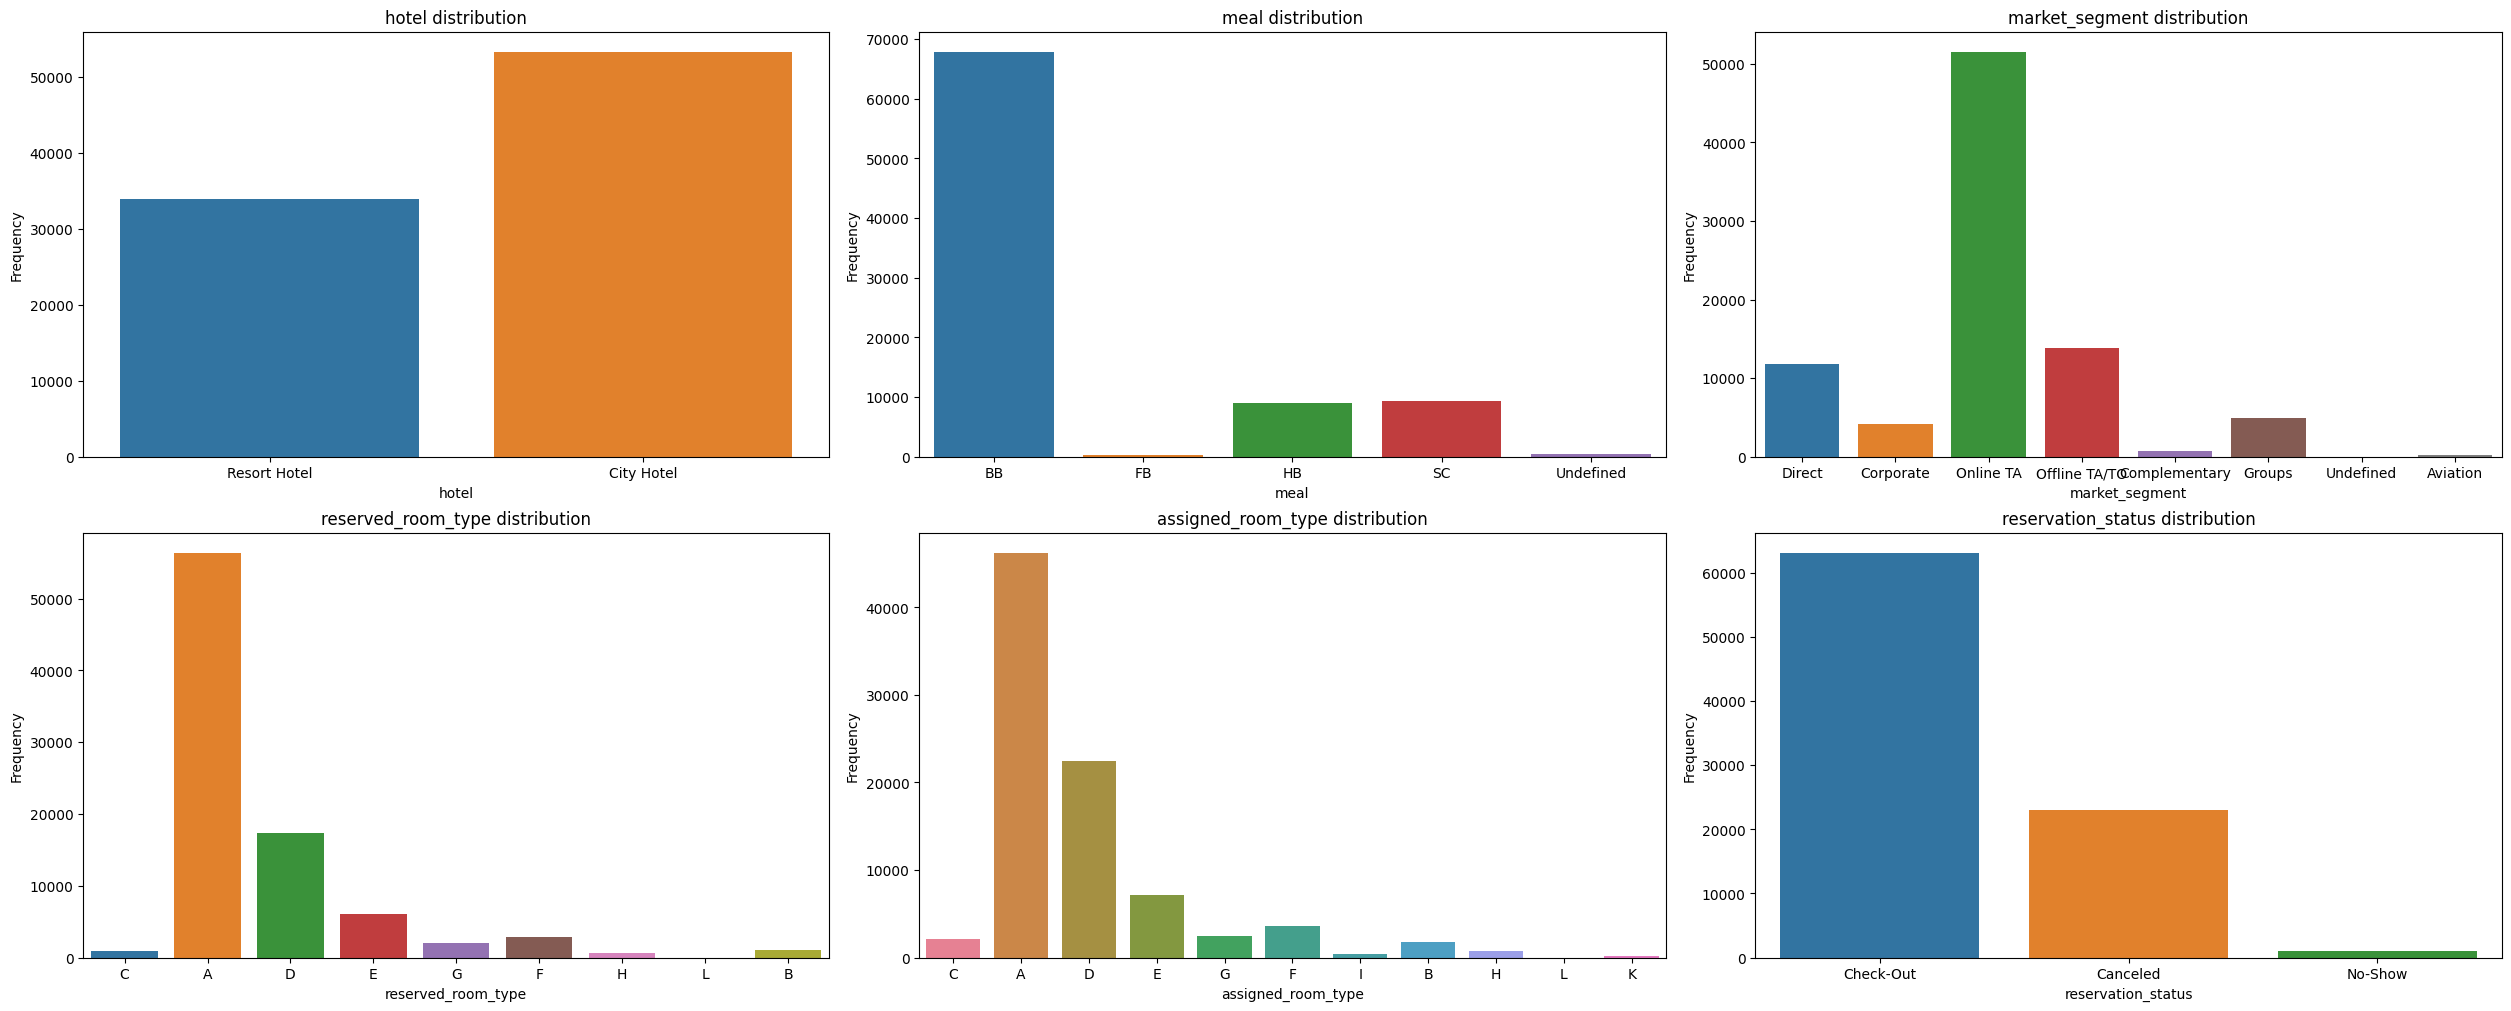

In [ ]:
plot_info = [
    {'col': 'hotel', 'title': 'hotel distribution', 'xlabel': 'hotel'},
    {'col': 'meal', 'title': 'meal distribution', 'xlabel': 'meal'},
    {'col': 'market_segment', 'title': 'market_segment distribution', 'xlabel': 'market_segment'},
    {'col': 'reserved_room_type', 'title': 'reserved_room_type distribution', 'xlabel': 'reserved_room_type'},
    {'col': 'assigned_room_type', 'title': 'assigned_room_type distribution', 'xlabel': 'assigned_room_type'},
    {'col': 'reservation_status', 'title': 'reservation_status distribution', 'xlabel': 'reservation_status'},
]

fig, axes = plt.subplots(2, 3, figsize=(25, 10), constrained_layout=True)

for ax, info in zip(axes.flatten(), plot_info):
    sns.countplot(x=info['col'], data=df11, ax=ax, hue=info['col'])
    ax.set_title(info['title'])
    ax.set_xlabel(info['xlabel'])
    ax.set_ylabel('Frequency')

plt.show()

**Based on the analysis of categorical variable distribution:**

*   Since both hotels are located in Portugal, most customers are from Portugal (PRT).

*   The most common way customers first learned about the hotel is through Online TA, and the most common booking method is through TA/TO.
*   City hotels have more customers than resort hotels.

*   The ratio of successful bookings to cancellations is approximately 2:1.




Data visualization dimensions:

    1.  Time
    2.  Hotel
    3.  Location
    4.  Customer

**What are the trends in reservations and cancellations over time?**

In [ ]:
# Monthly Number of Customers at Resort Hotel
resort_not_canceled = df11[(df11['hotel'] == 'Resort Hotel')].copy()
resort_guests = resort_not_canceled['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','num of Resort hotel guests']
resort_guests

,month,num of Resort hotel guests
0,August,4646
1,July,4307
2,May,2941
3,April,2825
4,June,2759
5,October,2722
6,March,2653
7,February,2484
8,September,2449
9,December,2110


In [ ]:
# Monthly Number of Customers at City Hotel
resort_not_canceled =  df11[(df11['hotel'] == 'City Hotel')].copy()
city_guests = resort_not_canceled['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','num of City hotel guests']
city_guests

,month,num of City hotel guests
0,August,6573
1,July,5727
2,May,5399
3,April,5070
4,June,4996
5,March,4830
6,September,4228
7,October,4196
8,February,3590
9,December,2998


In [ ]:
# Create a mapping of month names to numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
final_guests = city_guests.merge(resort_guests, on='month')

# Replace month names with numbers
final_guests['month'] = final_guests['month'].map(month_map)
final_guests['month'] = final_guests['month'].astype(int)
final_guests_sorted = final_guests.sort_values(by='month').reset_index(drop=True)
print(final_guests_sorted)

    month  num of City hotel guests  num of Resort hotel guests
0       1                      2724                        1957
1       2                      3590                        2484
2       3                      4830                        2653
3       4                      5070                        2825
4       5                      5399                        2941
5       6                      4996                        2759
6       7                      5727                        4307
7       8                      6573                        4646
8       9                      4228                        2449
9      10                      4196                        2722
10     11                      2922                        2048
11     12                      2998                        2110


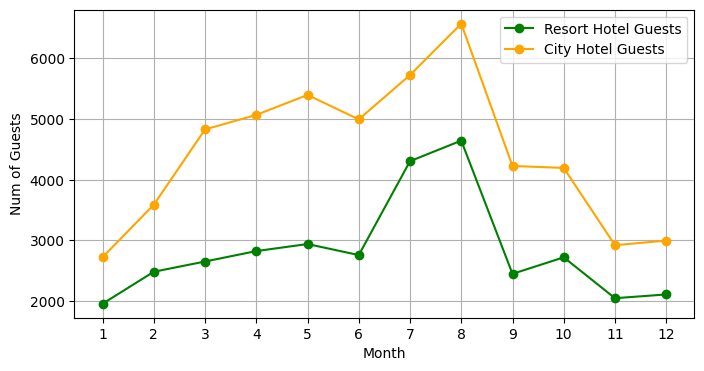

In [ ]:
plt.figure(figsize=(8, 4))

# Resort Hotel Customers
plt.plot(final_guests_sorted['month'], final_guests_sorted['num of Resort hotel guests'], marker='o', color='green', label='Resort Hotel Guests')

# City Hotel Customers
plt.plot(final_guests_sorted['month'], final_guests_sorted['num of City hotel guests'], marker='o', color='orange', label='City Hotel Guests')

plt.xlabel('Month')
plt.ylabel('Num of Guests')
plt.xticks(final_guests_sorted['month'])
plt.legend()
plt.grid(True)
plt.show()

**Both City Hotel and Resort Hotel experience an increase in customers during the summer and a decrease during the winter.**

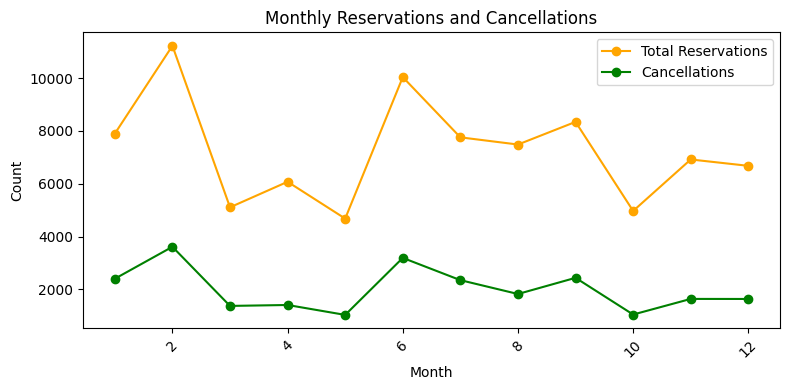

In [ ]:
monthly_counts = df11.groupby('arrival_date_month').size()
monthly_cancellations = df11[df11['is_canceled'] == 1].groupby('arrival_date_month').size()


plt.figure(figsize=(8, 4))


plt.plot(final_guests_sorted['month'], monthly_counts, label='Total Reservations', marker='o', color='orange')

plt.plot(final_guests_sorted['month'], monthly_cancellations, label='Cancellations', marker='o', color='green')


plt.title('Monthly Reservations and Cancellations')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()

**Seasonal Impact** : Both reservation and cancellation numbers show clear seasonal variations, with summer and year-end being peak times, and winter and early year being low times.

**Cancellation Rate Changes** : Higher cancellation rates in May and December may be related to specific seasonal factors such as weather changes or holiday arrangements.
Similar Trends: The similarity in trends between reservations and cancellations suggests that both are likely influenced by similar external factors

 ------------------------------------------------------------------------------
 2- **Hotel**

 What's the differences between the number of cancellation concerning types of hotel ?

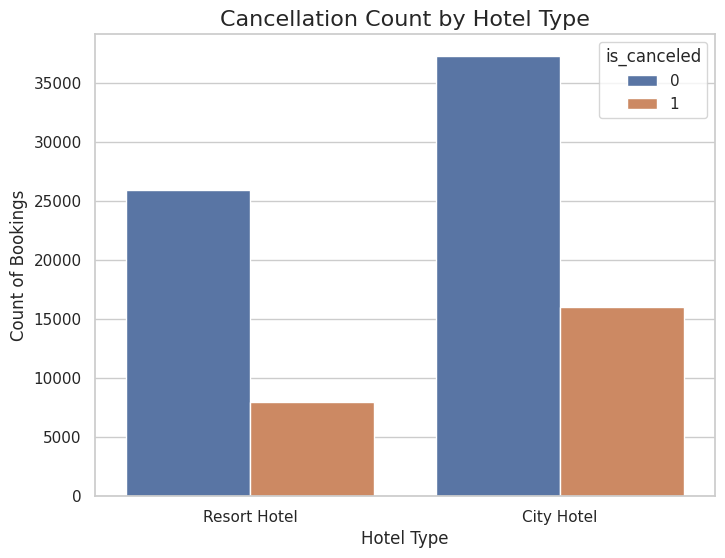

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df11)

# Set the title and labels
plt.title('Cancellation Count by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Count of Bookings', fontsize=12)
plt.show()

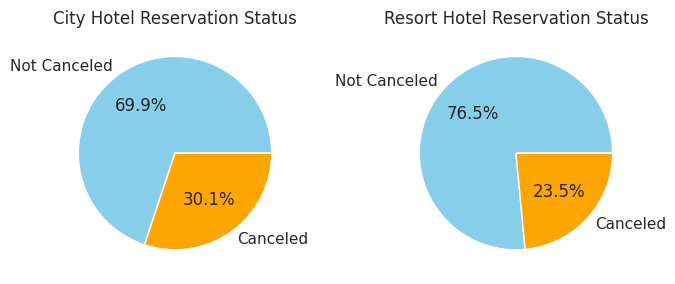

In [ ]:
hotel_status = df11.groupby(['hotel', 'is_canceled']).size().reset_index(name='num_of_reservations')
hotel_status['status'] = hotel_status['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})
city_data = hotel_status[hotel_status['hotel'] == 'City Hotel']
resort_data = hotel_status[hotel_status['hotel'] == 'Resort Hotel']

# City Hotel Pie Chart
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.pie(city_data['num_of_reservations'], labels=city_data['status'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('City Hotel Reservation Status')

# Resort Hotel Pie Chart
plt.subplot(1, 2, 2)
plt.pie(resort_data['num_of_reservations'], labels=resort_data['status'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Resort Hotel Reservation Status')
plt.tight_layout()
plt.show()

**Cancellation Rate Comparison:**
    City Hotels have a higher cancellation rate (30%) compared to Resort Hotels (24%).
    This suggests that City Hotels are more affected by cancellations, which could be due to various factors such as business travel fluctuations, easier access to alternative accommodations, or more competitive markets.

**Volume of Bookings:**
    Both hotel types have a higher volume of non-canceled bookings, indicating that the majority of customers do not cancel their reservations.
    However, the absolute number of canceled bookings in City Hotels is higher due to a larger total booking volume.

--------------------------------------------------------------------------------
What's the impact of booking means on cancellation rate ?

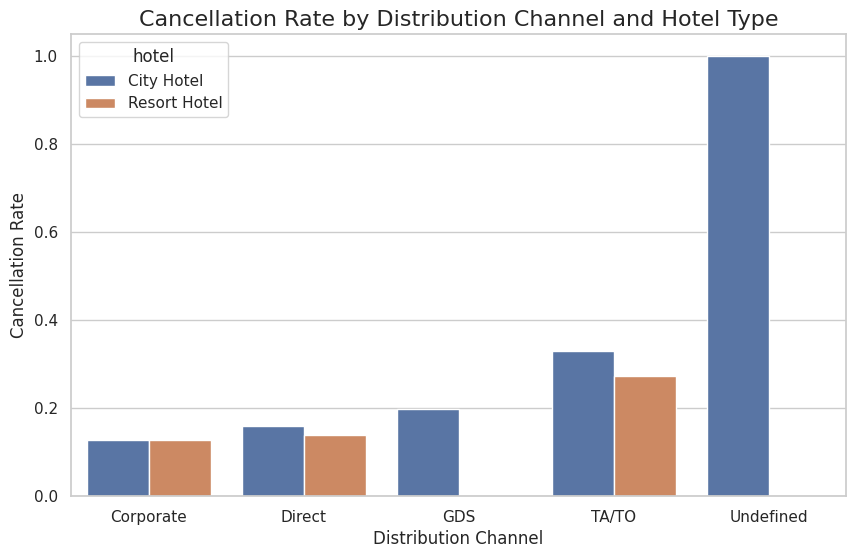

In [ ]:
# Set the plot style
sns.set(style="whitegrid")


channel_cancellation_rate = df11.groupby(['hotel', 'distribution_channel']).agg({'is_canceled': 'mean'}).reset_index()


plt.figure(figsize=(10, 6))


sns.barplot(x='distribution_channel', y='is_canceled', hue='hotel', data=channel_cancellation_rate)


plt.title('Cancellation Rate by Distribution Channel and Hotel Type', fontsize=16)
plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)

plt.show()

Excluding the "Undefined" channel, the cancellation rates from other channels provide a clearer perspective, indicating that bookings through travel agencies/online travel agencies have a higher cancellation rate.
Bookings made by corporate clients and through direct channels have lower cancellation rates, suggesting these customers are more likely to complete their reservations.

--------------------------------------------------------------------------------
3- **location**

Where are most canceled orders from ?

In [ ]:
cancel_by_country = df11[df11['is_canceled'] == 1]['country'].value_counts().reset_index()
cancel_by_country.columns = ['country', 'cancellation_num']
cancel_by_country

,country,cancellation_num
0,PRT,9801
1,GBR,1982
2,ESP,1860
3,FRA,1732
4,ITA,1075
...,...,...
122,ZMB,1
123,MUS,1
124,VGB,1
125,NIC,1


In [ ]:
total_canceled = cancel_by_country['cancellation_num'].sum()
top_10_canceled = cancel_by_country.head(10)
top_10_canceled['percentage']=top_10_canceled['cancellation_num']/total_canceled*100
top_10_canceled


<ipython-input-70-e9fb02424b9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_canceled['percentage']=top_10_canceled['cancellation_num']/total_canceled*100


,country,cancellation_num,percentage
0,PRT,9801,40.851117
1,GBR,1982,8.261087
2,ESP,1860,7.752584
3,FRA,1732,7.219073
4,ITA,1075,4.480660
5,DEU,1053,4.388963
6,BRA,726,3.026009
7,IRL,668,2.784261
8,USA,458,1.908970
9,BEL,411,1.713071


In [ ]:
other_sum = cancel_by_country.loc[~cancel_by_country['country'].isin(top_10_canceled['country'])]['cancellation_num'].sum()

# Create a new DataFrame for the 'Other' category
other_data = pd.DataFrame([{'country': 'Other', 'cancellation_num': other_sum, 'percentage': other_sum / total_canceled * 100}])

# Use pd.concat to append the new row
top_10_canceled = pd.concat([top_10_canceled, other_data], ignore_index=True)

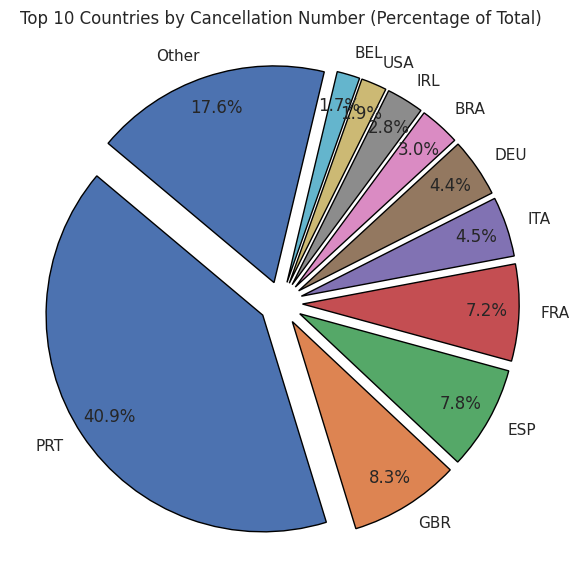

In [ ]:
plt.figure(figsize=(6, 6))
explode = [0.1] * len(top_10_canceled)
plt.pie(
    top_10_canceled['percentage'],
    labels=top_10_canceled['country'],
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.1,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'},
    explode=explode,
)

plt.title('Top 10 Countries by Cancellation Number (Percentage of Total)')
plt.tight_layout()
plt.show()

the top ten countries with highest cancellation rate are: Portugal, Great Britain, Spain, France, Italy, Germany, Ireland, Brazil, United States, Belgium
the highest One is : Portugal with 40.9%

--------------------------------------------------------------------------------
4- **Customer**

What's the relationship of customer type with cancellation rate ?

In [ ]:
# Create a new column to determine if children are present
df11['has_children'] = df11['children'] > 0
cancel_rate = df11.groupby(['customer_type', 'has_children'])['is_canceled'].mean().reset_index()
print(cancel_rate)

     customer_type  has_children  is_canceled
0         Contract         False     0.164034
1         Contract          True     0.150000
2            Group         False     0.099222
3            Group          True     0.074074
4        Transient         False     0.292615
5        Transient          True     0.375278
6  Transient-Party         False     0.152043
7  Transient-Party          True     0.168856


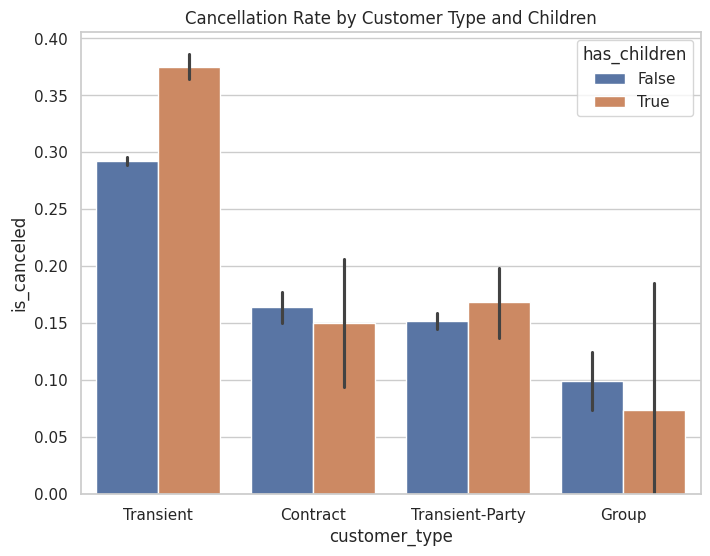

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df11, x='customer_type', y='is_canceled', hue='has_children')
plt.title('Cancellation Rate by Customer Type and Children')
plt.show()

Customers with children (True) tend to have a slightly lower cancellation rate across all customer types compared to those without children (False), except for the 'Transient-Party' type where the cancellation rates are similar.
Implication: This suggests that having children might be associated with a more committed booking behavior, possibly due to advanced planning needs for family trips.

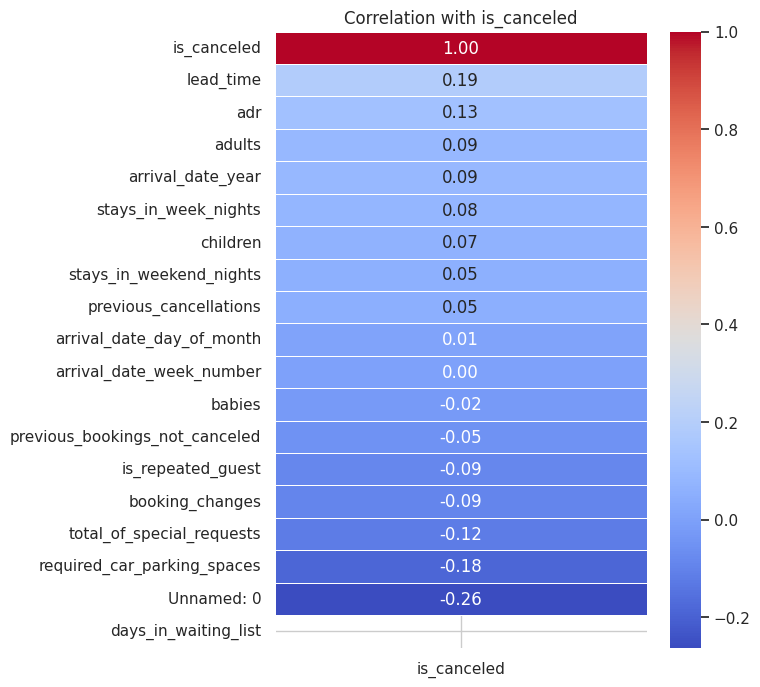

In [ ]:
# Select only numerical columns from the dataframe
numeric_df = df11.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical data
correlation_matrix = numeric_df.corr()

# Extract the correlation values
target_feature = 'is_canceled'
target_correlation = correlation_matrix[[target_feature]].sort_values(by=target_feature, ascending=False)
plt.figure(figsize=(6, 8))  #
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title(f'Correlation with {target_feature}')
plt.show()

<ipython-input-76-412877c36b2e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_range_cancellation = df11.groupby('lead_time_range')['is_canceled'].agg(['count', 'mean']).reset_index()
<ipython-input-76-412877c36b2e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lead_time_range_cancellation, x='lead_time_range', y='cancellation_rate', palette='coolwarm')


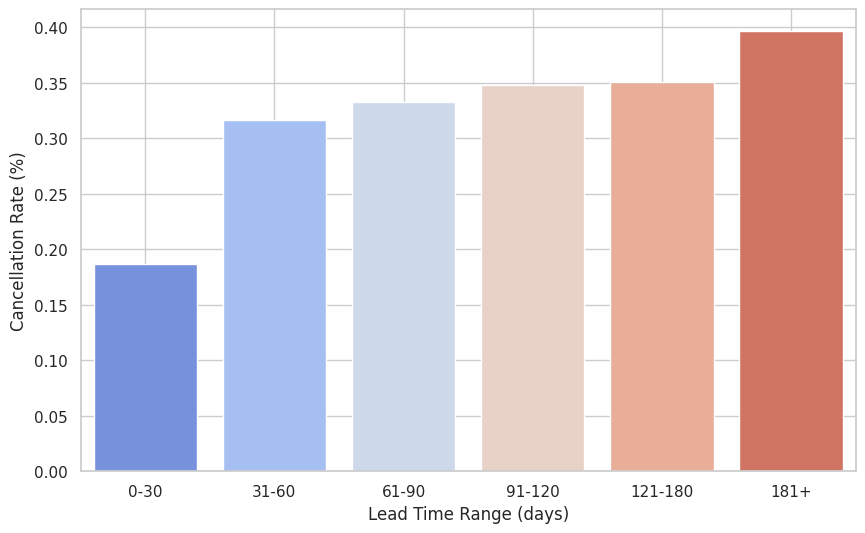

In [ ]:
df11['lead_time_range'] = pd.cut(df11['lead_time'], bins=[0, 30, 60, 90, 120, 180, 365], labels=['0-30', '31-60', '61-90', '91-120', '121-180', '181+'])

# Cancellation Rate by Range
lead_time_range_cancellation = df11.groupby('lead_time_range')['is_canceled'].agg(['count', 'mean']).reset_index()
lead_time_range_cancellation.columns = ['lead_time_range', 'total_reservations', 'cancellation_rate']

plt.figure(figsize=(10, 6))
sns.barplot(data=lead_time_range_cancellation, x='lead_time_range', y='cancellation_rate', palette='coolwarm')
plt.xlabel('Lead Time Range (days)')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

 **the longer the lead_time, the higher the cancellation rate**

## Modeling Part

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_bookings_cleaned.csv')

In [ ]:
df = pd.read_csv('hotel_bookings_cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87154 entries, 0 to 87153
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      87154 non-null  int64  
 1   hotel                           87154 non-null  object 
 2   is_canceled                     87154 non-null  int64  
 3   lead_time                       87154 non-null  float64
 4   arrival_date_year               87154 non-null  int64  
 5   arrival_date_month              87154 non-null  object 
 6   arrival_date_week_number        87154 non-null  int64  
 7   arrival_date_day_of_month       87154 non-null  int64  
 8   stays_in_weekend_nights         87154 non-null  int64  
 9   stays_in_week_nights            87154 non-null  int64  
 10  adults                          87154 non-null  int64  
 11  children                        87154 non-null  float64
 12  babies                          

In [ ]:
df["is_canceled"].value_counts()

,count
is_canceled,
0,63162
1,23992


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['reservation_status_date_year'] = df['reservation_status_date'].dt.year
df['reservation_status_date_month'] = df['reservation_status_date'].dt.month
df['reservation_status_date_day'] = df['reservation_status_date'].dt.day

In [ ]:
df.drop(columns=['reservation_status_date'],inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,Resort Hotel,0,342.00000,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,7,1
1,Resort Hotel,0,79.99159,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,7,1
2,Resort Hotel,0,7.00000,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015,7,2
3,Resort Hotel,0,13.00000,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015,7,2
4,Resort Hotel,0,14.00000,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015,7,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87154 entries, 0 to 87153
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87154 non-null  object 
 1   is_canceled                     87154 non-null  int64  
 2   lead_time                       87154 non-null  float64
 3   arrival_date_year               87154 non-null  int64  
 4   arrival_date_month              87154 non-null  object 
 5   arrival_date_week_number        87154 non-null  int64  
 6   arrival_date_day_of_month       87154 non-null  int64  
 7   stays_in_weekend_nights         87154 non-null  int64  
 8   stays_in_week_nights            87154 non-null  int64  
 9   adults                          87154 non-null  int64  
 10  children                        87154 non-null  float64
 11  babies                          87154 non-null  int64  
 12  meal                            

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for column in object_columns:
    le = LabelEncoder()

    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [ ]:
#df_pandas_encoded = pd.get_dummies(df, drop_first=True)
#df_pandas_encoded

In [ ]:
df.head ()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,1,0,342.00000,2015,5,27,1,0,0,2,...,0,0,2,0.0,0,0,1,2015,7,1
1,1,0,79.99159,2015,5,27,1,0,0,2,...,0,0,2,0.0,0,0,1,2015,7,1
2,1,0,7.00000,2015,5,27,1,0,1,1,...,0,0,2,75.0,0,0,1,2015,7,2
3,1,0,13.00000,2015,5,27,1,0,1,1,...,0,0,2,75.0,0,0,1,2015,7,2
4,1,0,14.00000,2015,5,27,1,0,2,2,...,0,0,2,98.0,0,1,1,2015,7,3


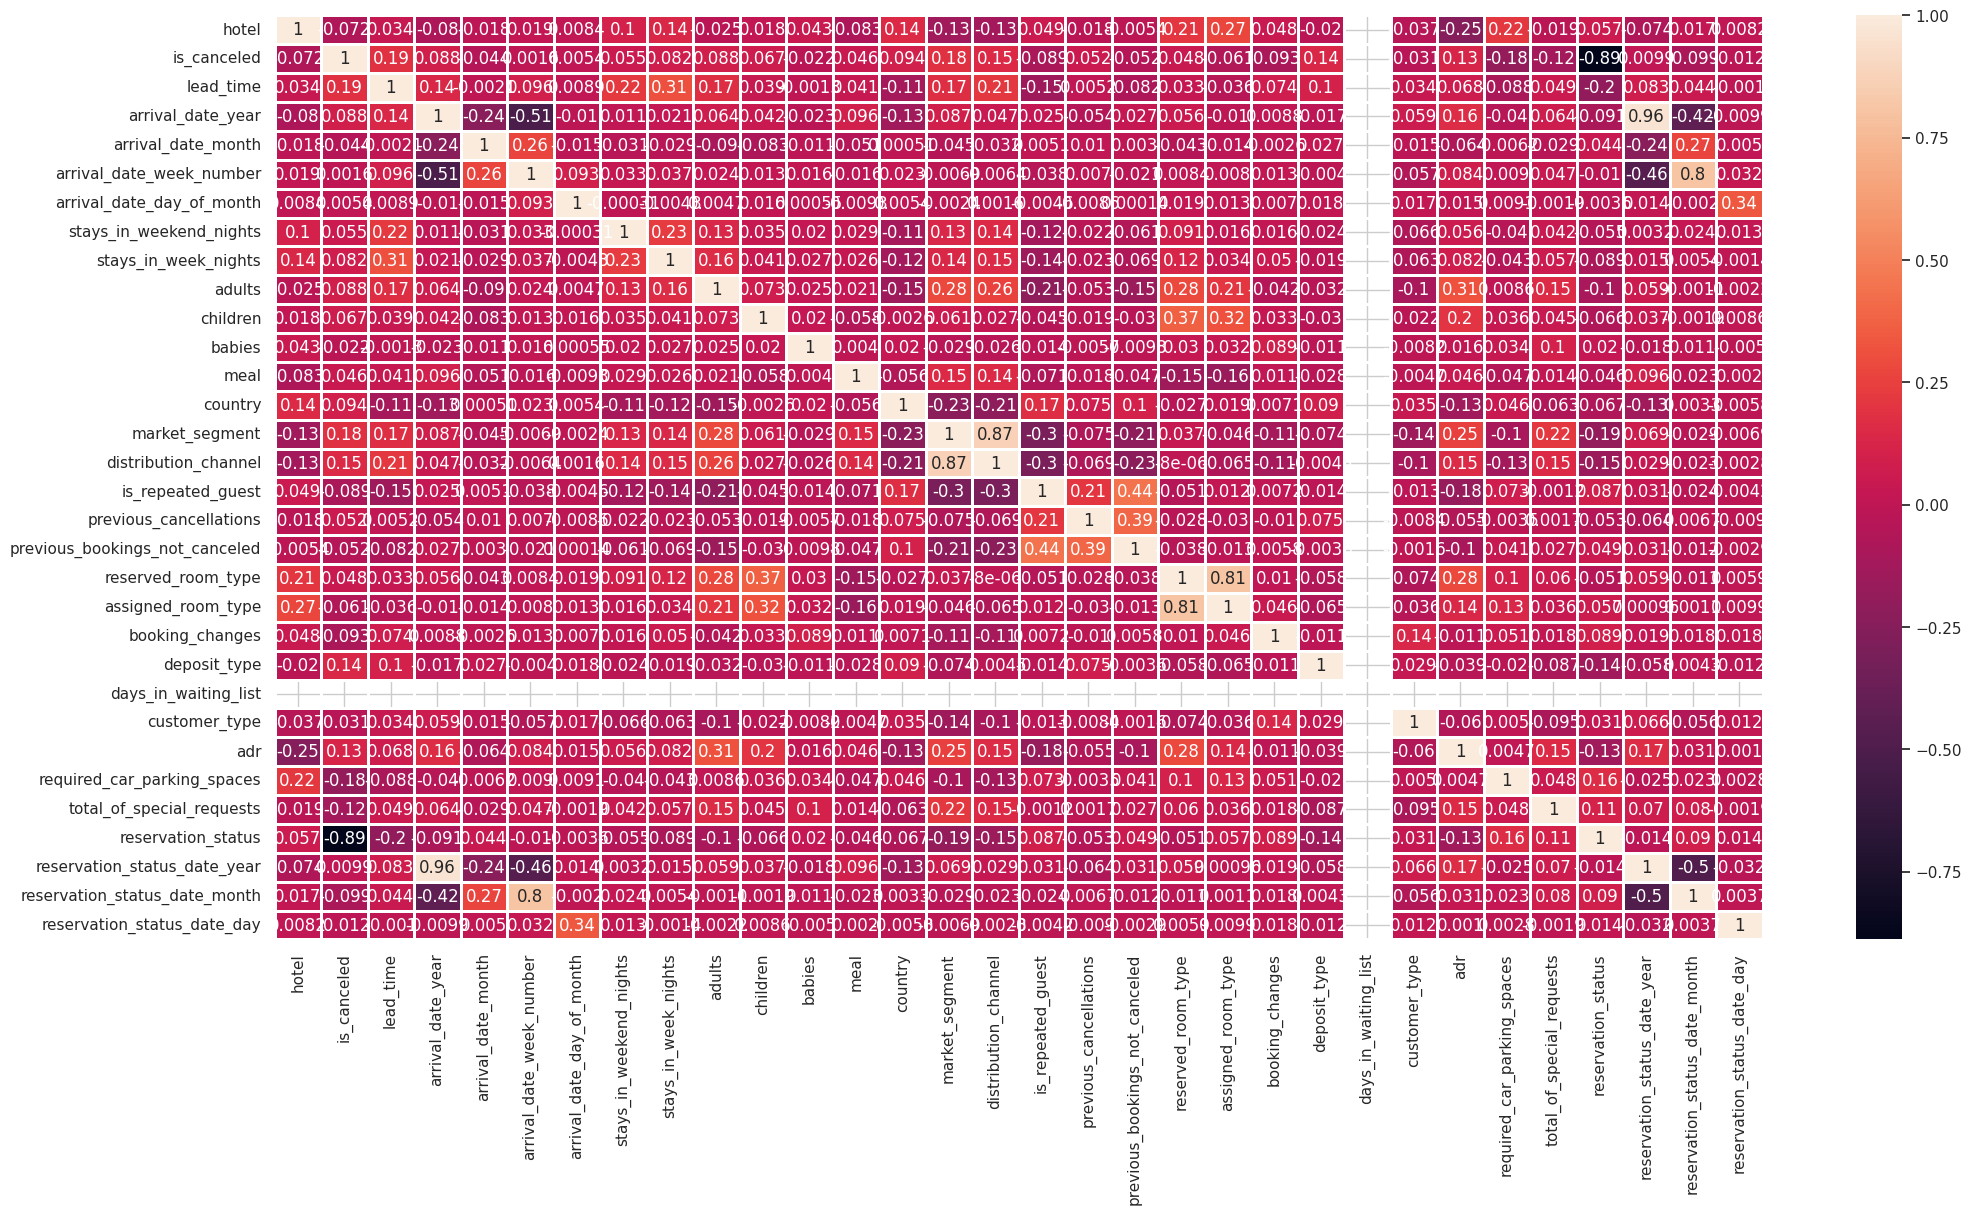

In [ ]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

,is_canceled
is_canceled,1.000000
reservation_status,0.888661
lead_time,0.186576
required_car_parking_spaces,0.184551
market_segment,0.182000
distribution_channel,0.150198
deposit_type,0.137287
adr,0.129073
total_of_special_requests,0.120648
reservation_status_date_month,0.098577


In [ ]:
x = df[['reservation_status', 'lead_time', 'required_car_parking_spaces',
              'market_segment', 'distribution_channel', 'deposit_type', 'adr',
              'total_of_special_requests', 'reservation_status_date_month',
              'country', 'booking_changes', 'is_repeated_guest', 'adults',
              'arrival_date_year']].copy().values
y=df['is_canceled'].copy().values

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 ,random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
ros_scaler = StandardScaler()
x_train = ros_scaler.fit_transform(x_train)
x_test = ros_scaler.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVC

svc_linear=SVC(kernel='linear',C=1,gamma=0.01)
svc_clf_linear = svc_linear.fit(x_train,y_train)
svc_clf_linear.score(x_train,y_train)


0.9758700941500053

In [ ]:
svc_clf_linear.score(x_test,y_test)


0.9880673734453165

In [ ]:
from sklearn import metrics
y_pred = svc_clf_linear.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("precition:", metrics.precision_score(y_test, y_pred))

print("f1 score:", metrics.f1_score(y_test, y_pred))

print("recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.9880673734453165
precition: 1.0
f1 score: 0.9774383894481083
recall: 0.9558723693143245


0.9880673734453165


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

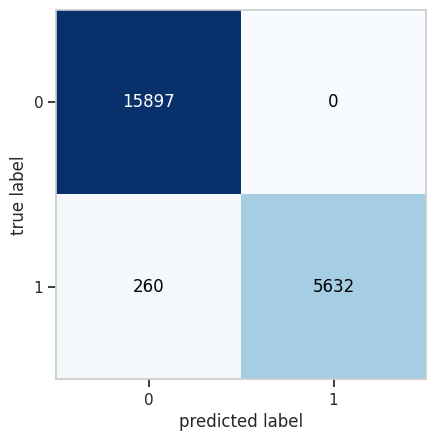

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, svc_clf_linear.predict(x_test))
print(svc_clf_linear.score(x_test, y_test))
plot_confusion_matrix(cm)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgbmodel=xgb.fit(x_train, y_train)
xgbmodel.score(x_train,y_train)

0.9999894213477203

In [ ]:
xgbmodel.score(x_test , y_test)

0.2704116756161366

In [ ]:
from sklearn import metrics
y_pred = xgbmodel.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("precition:", metrics.precision_score(y_test, y_pred))

print("f1 score:", metrics.f1_score(y_test, y_pred))

print("recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.2704116756161366
precition: 0.2704116756161366
f1 score: 0.42570716375853473
recall: 1.0


0.2704116756161366


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

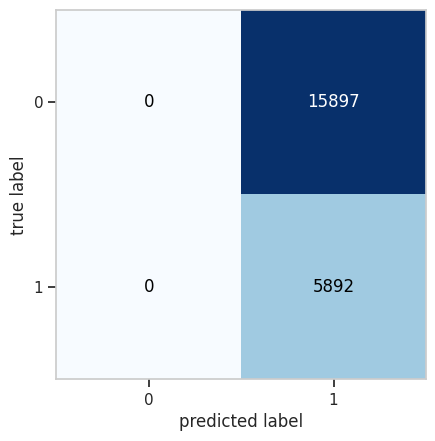

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, xgbmodel.predict(x_test))
print(xgbmodel.score(x_test, y_test))
plot_confusion_matrix(cm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knnmodel=knn.fit(x_train, y_train)
knnmodel.score(x_train,y_train)

0.9944991008145563

In [ ]:
knnmodel.score(x_test , y_test)

0.9983477901693515

In [ ]:
from sklearn import metrics
y_pred = knnmodel.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("precition:", metrics.precision_score(y_test, y_pred))

print("f1 score:", metrics.f1_score(y_test, y_pred))

print("recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.9983477901693515
precition: 0.9976206662134602
f1 score: 0.9969429347826086
recall: 0.9962661235573659


0.9983477901693515


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

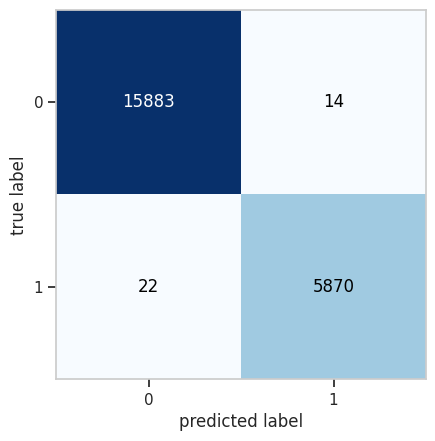

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, knnmodel.predict(x_test))
print(knnmodel.score(x_test, y_test))
plot_confusion_matrix(cm)

In [ ]:
from sklearn.linear_model import LogisticRegression
Lg = LogisticRegression()
Logisticmodel=Lg.fit(x_train, y_train)
Logisticmodel.score(x_train,y_train)

0.9769068020734158

In [ ]:
Logisticmodel.score(x_test , y_test)

0.9838450594336592

In [ ]:
from sklearn import metrics
y_pred = Logisticmodel.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("precition:", metrics.precision_score(y_test, y_pred))

print("f1 score:", metrics.f1_score(y_test, y_pred))

print("recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.9838450594336592
precition: 0.983927323549965
f1 score: 0.9696969696969697
recall: 0.9558723693143245


0.9838450594336592


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

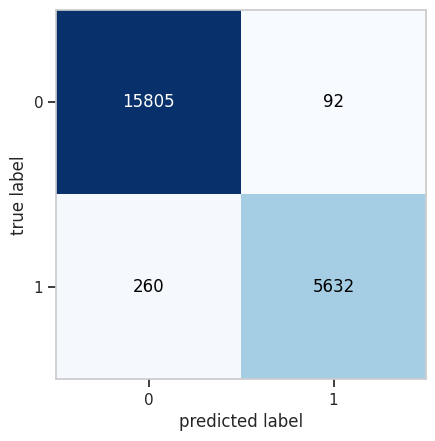

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, Logisticmodel.predict(x_test))
print(Logisticmodel.score(x_test, y_test))
plot_confusion_matrix(cm)

##THANK YOU